[(array([232, 251], dtype=int64), 241.604, 246), (array([138, 249], dtype=int64), 219.956, 240), (array([180, 231], dtype=int64), 214.612, 216), (array([338, 375], dtype=int64), 363.0982785714286, 360), (array([138, 261], dtype=int64), 241.00860000000003, 246), (array([214, 286], dtype=int64), 258.555, 255), (array([292, 362], dtype=int64), 337.1431, 360), (array([304, 377], dtype=int64), 337.11115, 360), (array([ 90, 201], dtype=int64), 178.654, 138), (array([285, 441], dtype=int64), 354.069, 351), (array([ 99, 201], dtype=int64), 178.658, 192), (array([100, 162], dtype=int64), 143.6386428571428, 132), (array([292, 417], dtype=int64), 350.223, 378), (array([194, 232], dtype=int64), 215.122, 218), (array([307, 484], dtype=int64), 361.7875, 360), (array([162, 270], dtype=int64), 241.0292, 252), (array([176, 210], dtype=int64), 200.562, 180), (array([ 66, 168], dtype=int64), 140.614, 138), (array([160, 209], dtype=int64), 198.352, 196), (array([168, 280], dtype=int64), 246.766, 252), (ar

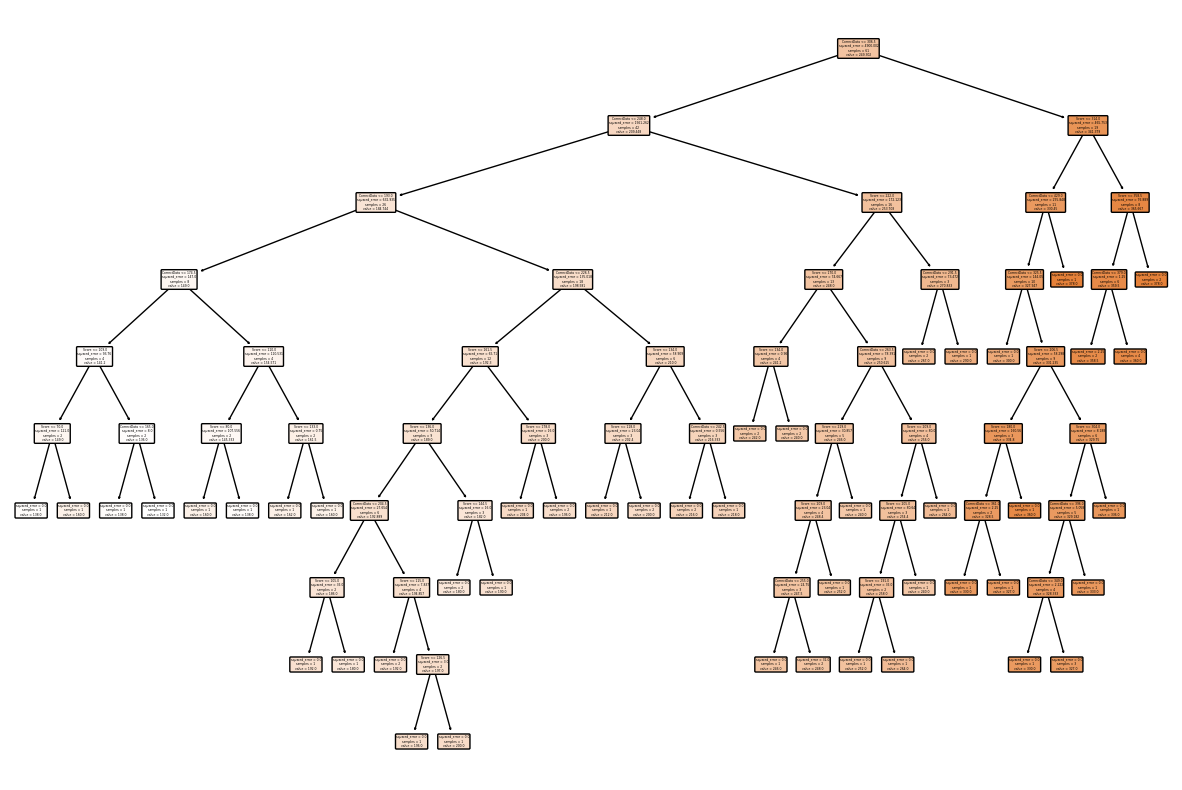

MAE:  12.128074857142856
MSE:  245.17678686279177
RMSE:  15.658122073313638
R-squared:  0.9591289843906629
Cross-validation scores: [-0.81255143  0.82324978  0.78706032  0.87704998  0.83473206  0.9156712
  0.93128695]
Mean R-squared: 0.6223569796006597
Mean squared error: 343.7887203837539
Root mean squared error: 17.822456820595452
Mean absolute error: 15.349820791649993
Median absolute error: 14.715988605442172


In [1]:
# Random Forest Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Load the data into a DataFrame
df = pd.read_excel("../Dataset/Dataset.xlsx")

# Save the DataFrame to a CSV file with ',' as the delimiter
df.to_csv("Dataset.csv", index=False, sep=',')

# Importing the dataset
dataset = pd.read_csv('Dataset.csv')

# Remove obsolete rows (just so as not to confuse the model)
mask = dataset['CorrectData'] < dataset['SubsequentPerfectScore']
dataset = dataset.drop(dataset[mask].index)
mask = dataset['SubsequentPerfectScore'] < dataset['Score']
dataset = dataset.drop(dataset[mask].index)

# Importing the dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)
print([(X_test[i], y_pred[i], y_test[i]) for i in range(len(y_pred))])

# Visualising the Random Forest Regression results (higher resolution)
# X_grid = np.arange(min(X), max(X), 0.01)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(X, y, color = 'red')
# plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
# plt.title('Truth or Bluff (Random Forest Regression)')
# plt.xlabel('Position level')
# plt.ylabel('Salary')
# plt.show()

# from sklearn.tree import export_graphviz
# import graphviz

# tree = regressor.estimators_[0]
# dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, filled=True, rounded=True)
# graphviz.Source(dot_data)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(regressor.estimators_[0], feature_names=dataset.columns[:-1], filled=True, rounded=True)
plt.savefig("Random_forest.png", dpi=450)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-squared: ", r2)



#####



### CROSS VALIDATION ###
from sklearn.model_selection import KFold, cross_val_score


# Define number of folds for cross-validation
k = 7

# Perform 5-fold cross validation
cv_scores = cross_val_score(regressor, X, y, cv=k)

# Calculate R-squared for each fold
r2_scores = cross_val_score(regressor, X, y, cv=k, scoring='r2')

# Calculate mean squared error for each fold
mse_scores = cross_val_score(regressor, X, y, cv=k, scoring='neg_mean_squared_error')
mse_scores = abs(mse_scores)

# Calculate root mean squared error for each fold
rmse_scores = np.sqrt(mse_scores)

# Calculate mean absolute error for each fold
mae_scores = cross_val_score(regressor, X, y, cv=k, scoring='neg_mean_absolute_error')
mae_scores = abs(mae_scores)

# Calculate median absolute error for each fold
medae_scores = cross_val_score(regressor, X, y, cv=k, scoring='neg_median_absolute_error')
medae_scores = abs(medae_scores)

# Print the results
print("Cross-validation scores:", cv_scores)
print("Mean R-squared:", np.mean(r2_scores))
print("Mean squared error:", np.mean(mse_scores))
print("Root mean squared error:", np.mean(rmse_scores))
print("Mean absolute error:", np.mean(mae_scores))
print("Median absolute error:", np.mean(medae_scores))

Predictions:  [232 251] 240.0
Predictions:  [138 249] 200.0
Predictions:  [180 231] 216.0
Predictions:  [338 375] 358.5
Predictions:  [138 261] 240.0
Predictions:  [214 286] 264.0
Predictions:  [292 362] 336.0
Predictions:  [304 377] 327.0
Predictions:  [ 90 201] 192.0
Predictions:  [285 441] 351.0
Predictions:  [ 99 201] 192.0
Predictions:  [100 162] 160.0
Predictions:  [292 417] 351.0
Predictions:  [194 232] 216.0
Predictions:  [307 484] 360.0
Predictions:  [162 270] 240.0
Predictions:  [176 210] 204.0
Predictions:  [ 66 168] 138.0
Predictions:  [160 209] 196.0
Predictions:  [168 280] 240.0
Predictions:  [280 322] 336.0
Predictions:  [160 213] 204.0
Predictions:  [280 355] 336.0
Predictions:  [172 253] 240.0
Predictions:  [ 80 197] 192.0
MAE:  15.3
MSE:  455.89
RMSE:  21.35158073773462
R-squared:  0.9240030528804991
Cross-validation scores: [-0.78488914  0.7523825   0.76437073  0.86319675  0.80332931  0.73544564
  0.88377299]
Mean R-squared: 0.5739441124812915
Mean squared error: 456

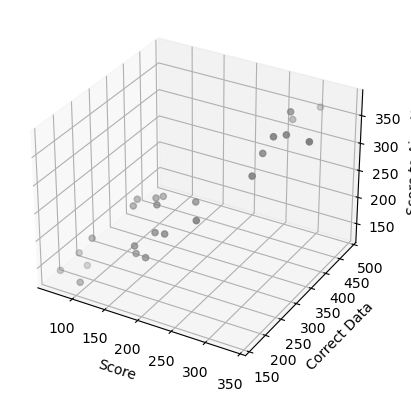

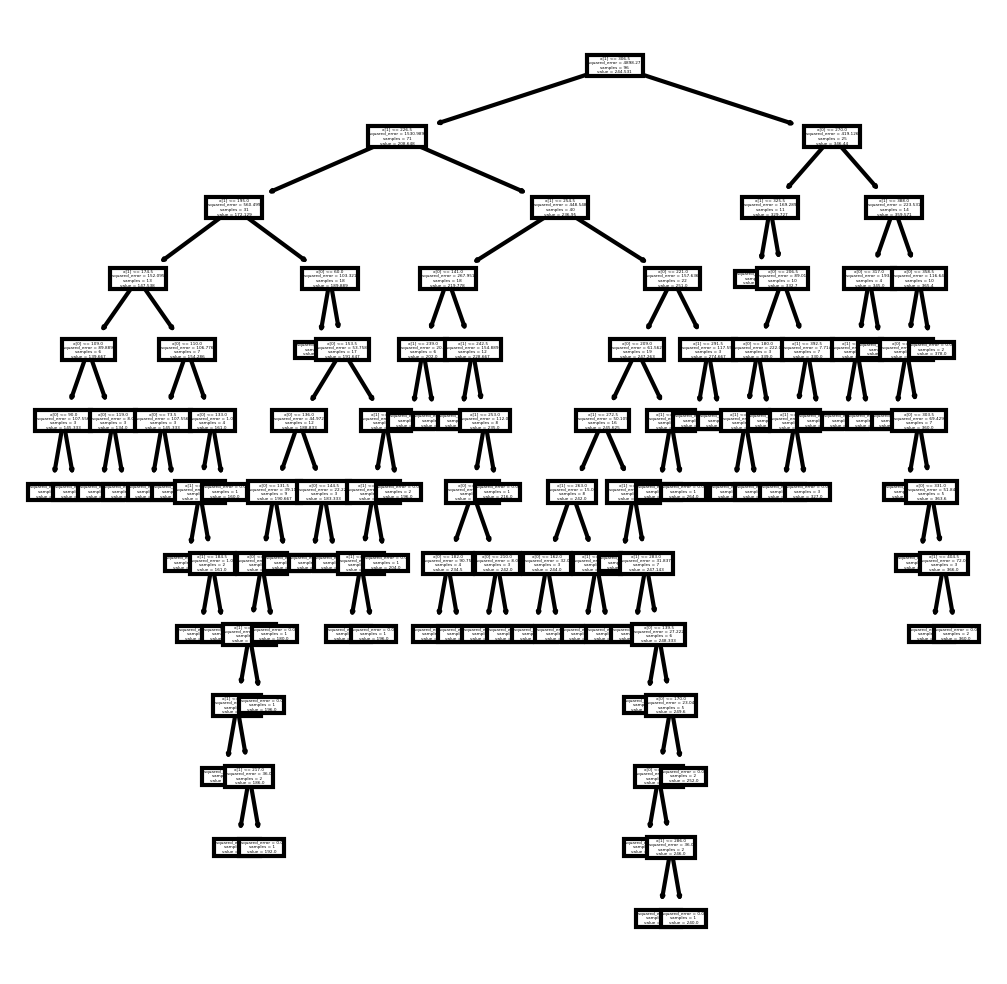

<Figure size 640x480 with 0 Axes>

In [2]:
# Decision Tree Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Load the data into a DataFrame
df = pd.read_excel("../Dataset/Dataset.xlsx")

# Save the DataFrame to a CSV file with ',' as the delimiter
df.to_csv("Dataset.csv", index=False, sep=',')

# Importing the dataset
dataset = pd.read_csv('Dataset.csv')

# Remove obsolete rows (just so as not to confuse the model)
mask = dataset['CorrectData'] < dataset['SubsequentPerfectScore']
dataset = dataset.drop(dataset[mask].index)
mask = dataset['SubsequentPerfectScore'] < dataset['Score']
dataset = dataset.drop(dataset[mask].index)

# Importing the dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)
for i in range(len(y_pred)):
    print("Predictions: ", X_test[i], y_pred[i])

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], y_test, c='gray', marker='o')
ax.set_xlabel('Score')
ax.set_ylabel('Correct Data')
ax.set_zlabel('Score to Aim At')




# from sklearn.tree import export_graphviz
# import graphviz

# dot_data = export_graphviz(regressor, out_file=None, feature_names=X.columns[:-1], filled=True, rounded=True)
# graphviz.Source(dot_data)





from sklearn.tree import plot_tree

# Build and fit your regression tree
# ...

# Create a new figure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)

# Plot the tree
plt.figure()
plot_tree(regressor, ax=axes)
plt.savefig('tree.eps',format='png',bbox_inches = "tight")



from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-squared: ", r2)



#####



### CROSS VALIDATION ###
from sklearn.model_selection import KFold, cross_val_score


# Define number of folds for cross-validation
k = 7

# Perform 5-fold cross validation
cv_scores = cross_val_score(regressor, X, y, cv=k)

# Calculate R-squared for each fold
r2_scores = cross_val_score(regressor, X, y, cv=k, scoring='r2')

# Calculate mean squared error for each fold
mse_scores = cross_val_score(regressor, X, y, cv=k, scoring='neg_mean_squared_error')
mse_scores = abs(mse_scores)

# Calculate root mean squared error for each fold
rmse_scores = np.sqrt(mse_scores)

# Calculate mean absolute error for each fold
mae_scores = cross_val_score(regressor, X, y, cv=k, scoring='neg_mean_absolute_error')
mae_scores = abs(mae_scores)

# Calculate median absolute error for each fold
medae_scores = cross_val_score(regressor, X, y, cv=k, scoring='neg_median_absolute_error')
medae_scores = abs(medae_scores)

# Print the results
print("Cross-validation scores:", cv_scores)
print("Mean R-squared:", np.mean(r2_scores))
print("Mean squared error:", np.mean(mse_scores))
print("Root mean squared error:", np.mean(rmse_scores))
print("Mean absolute error:", np.mean(mae_scores))
print("Median absolute error:", np.mean(medae_scores))